In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

import lightgbm as lgb


In [100]:
df_train = pd.read_csv('train.csv',index_col=0)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df_test = pd.read_csv('test.csv',index_col=0)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
print(df_train.Pclass.unique())
print(df_train.Sex.unique())
print(df_train.SibSp.unique())
print(df_train.Parch.unique())
print(df_train.Cabin.unique())
print(df_train.Embarked.unique())

categorical_features = ['Pclass','Sex', 'SibSp', 'Parch', 'Embarked']

[3 1 2]
['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'


In [73]:
print(df.Pclass.unique())
print(df.Sex.unique())
print(df.SibSp.unique())
print(df.Parch.unique())
print(df.Cabin.unique())
print(df.Embarked.unique())

[2 0 1]
[1 0]
[1 0 3 4 2 5 6]
[0 1 2 5 3 4 6 7]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C1

In [171]:
df = pd.concat([df_train.drop('Survived',axis=1),df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
print(df.Pclass.unique())
print(df.Sex.unique())
print(df.SibSp.unique())
print(df.Parch.unique())
print(df.Cabin.unique())
print(df.Embarked.unique())

df.info()

[3 1 2]
['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6 9]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50

## preprocess

In [175]:
df['CabinType'] = df['Cabin'].apply(lambda x: str(x)[0])
df.head()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [176]:
df.Embarked.fillna("NaN",inplace=True)

le_dict = {}
labels = ['Pclass','Sex', 'SibSp', 'Parch', 'Embarked','CabinType']
for label in labels:
    le_dict[label] = LabelEncoder().fit(df[label].values)
    df[label] = le_dict[label].transform(df[label]).astype(np.int8)

In [177]:
le_dict

{'Pclass': LabelEncoder(),
 'Sex': LabelEncoder(),
 'SibSp': LabelEncoder(),
 'Parch': LabelEncoder(),
 'Embarked': LabelEncoder(),
 'CabinType': LabelEncoder()}

In [178]:
train_size = len(df_train)
train_size

891

In [179]:
display(df[:train_size].tail())
display(df_test[:3])

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType
PassengerId,,,,,,,,,,,
887,1,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,3,8
888,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,3,1
889,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,3,8
890,0,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,0,2
891,2,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,2,8


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


category変数の変換のために, trainとtestをconcatした  
その時点でtarget columnは落ちている

In [229]:
X = df[:train_size].drop(['Name','Ticket','Cabin'],axis=1)
y = df_train.Survived
X_pred = df[train_size:].drop(['Name','Ticket','Cabin'],axis=1)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [182]:
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
lgb_eval  = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data=False)

In [183]:
params = {
    'task' : 'train',
    'boosting_type' : 'gbdt',
    'objective' : 'binary',
#     'objective' : 'regression',
    'metric' : {'l2', 'auc'},
    'num_leaves' : 31,
    'learning_rate' : 0.05,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.8,
    'bagging_freq': 5,
    'verbose' : 0
}

In [218]:
evaluation_results = {}
gbm = lgb.train(params=params,
                train_set=lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                categorical_feature=categorical_features,
                early_stopping_rounds=100,
                evals_result=evaluation_results,
#                 valid_names=['Train', 'Test'],
#                 valid_sets=[lgb_train, lgb_eval]
               )

[1]	valid_0's auc: 0.764045	valid_0's l2: 0.235078
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.83406	valid_0's l2: 0.224762
[3]	valid_0's auc: 0.847518	valid_0's l2: 0.21658
[4]	valid_0's auc: 0.844835	valid_0's l2: 0.208096
[5]	valid_0's auc: 0.84777	valid_0's l2: 0.201511
[6]	valid_0's auc: 0.849363	valid_0's l2: 0.19476
[7]	valid_0's auc: 0.855148	valid_0's l2: 0.191657
[8]	valid_0's auc: 0.855861	valid_0's l2: 0.185845
[9]	valid_0's auc: 0.858964	valid_0's l2: 0.180682
[10]	valid_0's auc: 0.861563	valid_0's l2: 0.178056
[11]	valid_0's auc: 0.862401	valid_0's l2: 0.173532
[12]	valid_0's auc: 0.863953	valid_0's l2: 0.169338
[13]	valid_0's auc: 0.86433	valid_0's l2: 0.166267
[14]	valid_0's auc: 0.864791	valid_0's l2: 0.163601
[15]	valid_0's auc: 0.865294	valid_0's l2: 0.160565
[16]	valid_0's auc: 0.864707	valid_0's l2: 0.158313
[17]	valid_0's auc: 0.864791	valid_0's l2: 0.155559
[18]	valid_0's auc: 0.866971	valid_0's l2: 0.153097
[19]	valid_0's 

KeyError: 'Test'

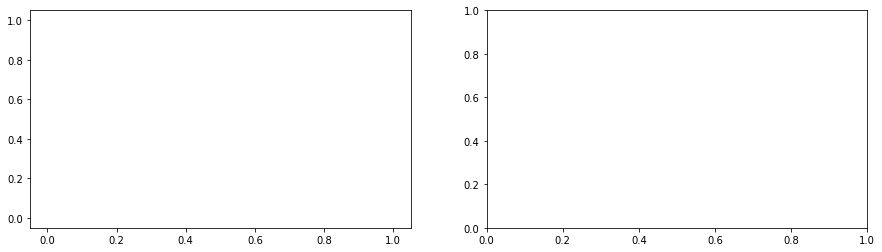

In [199]:
fig, axs = plt.subplots(1, 2, figsize=[15, 4])

# Plot the log loss during training
axs[0].plot(evaluation_results['Train']['binary_logloss'], label='Train')
axs[0].plot(evaluation_results['Test']['binary_logloss'], label='Test')
axs[0].set_ylabel('Log loss')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': clf.feature_name(), 
                            'importance': clf.feature_importance()}).sort_values('importance', ascending=False)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')

plt.show()

In [208]:
preds = np.round(gbm.predict(X_test))
print('Accuracy score = \t {}'.format(accuracy_score(y_test, preds)))
print('Precision score = \t {}'.format(precision_score(y_test, preds)))
print('Recall score =   \t {}'.format(recall_score(y_test, preds)))
print('F1 score =      \t {}'.format(f1_score(y_test, preds)))

Accuracy score = 	 0.8251121076233184
Precision score = 	 0.8048780487804879
Recall score =   	 0.7415730337078652
F1 score =      	 0.7719298245614036


In [226]:
preds = np.round(gbm.predict(X_test))
print('Accuracy score = \t {}'.format(accuracy_score(y_test, preds)))
print('Precision score = \t {}'.format(precision_score(y_test, preds)))
print('Recall score =   \t {}'.format(recall_score(y_test, preds)))
print('F1 score =      \t {}'.format(f1_score(y_test, preds)))

Accuracy score = 	 0.8251121076233184
Precision score = 	 0.8048780487804879
Recall score =   	 0.7415730337078652
F1 score =      	 0.7719298245614036


In [227]:
gbm.predict(X_pred)

array([0.06400953, 0.25754424, 0.08641958, 0.24326925, 0.5111972 ,
       0.15048512, 0.59008629, 0.17155237, 0.72077551, 0.02277106,
       0.04632816, 0.09504057, 0.9237232 , 0.05780373, 0.94899643,
       0.94775655, 0.09636247, 0.20765949, 0.63270913, 0.46128374,
       0.2618787 , 0.28848528, 0.91863814, 0.26636379, 0.94282477,
       0.03111072, 0.96610867, 0.23207491, 0.46435981, 0.18207136,
       0.06880254, 0.07632485, 0.53818775, 0.25672714, 0.63946897,
       0.14643452, 0.24693714, 0.25645326, 0.05057276, 0.10642751,
       0.14079549, 0.53401578, 0.05615627, 0.95353378, 0.94927321,
       0.23414787, 0.45595134, 0.11372636, 0.96397857, 0.66018044,
       0.34580146, 0.22250248, 0.90358707, 0.9111134 , 0.29831059,
       0.05314764, 0.04543361, 0.30457044, 0.12132854, 0.96232527,
       0.05778429, 0.13669298, 0.0678097 , 0.7169756 , 0.70693111,
       0.96608949, 0.56189323, 0.1048723 , 0.54664565, 0.89971425,
       0.69564635, 0.05794704, 0.54014849, 0.62624732, 0.95330

In [228]:
print(gbm.feature_importance())
print(X.columns)

[105  85 672   1   0 608  67 107]
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'CabinType'],
      dtype='object')


In [203]:
y_pred = gbm.predict(X_pred, num_iteration=gbm.best_iteration)
y_pred[:10]

array([0.06400953, 0.25754424, 0.08641958, 0.24326925, 0.5111972 ,
       0.15048512, 0.59008629, 0.17155237, 0.72077551, 0.02277106])

In [204]:
submission = pd.DataFrame()
submission['PassengerId'] = X_pred.index
submission['Survived'] = list(map(lambda x: 1 if x > 0.5 else 0, y_pred))

In [205]:
submission.to_csv('submission.csv',index=None)

## tuning

https://www.kaggle.com/currypurin/titanic-lightgbm

In [219]:
import optuna, os, uuid, pickle

def train_optuna():
#     data = load_breast_cancer()
#     X_train, X_test, y_train, y_test = train_test_split(data["data"], data["target"], test_size=0.3, random_state=19)

    def objectives(trial):
        # 試行にUUIDを設定
        trial_uuid = str(uuid.uuid4())
        trial.set_user_attr("uuid", trial_uuid)

        params = {
            'boosting_type': trial.suggest_categorical('boosting', ['gbdt', 'dart', 'goss']),
            'objective': 'binary',
            'metric': {'binary', 'binary_error', 'auc'},
            'num_leaves': trial.suggest_int("num_leaves", 10, 500),
            'learning_rate': trial.suggest_loguniform("learning_rate", 1e-5, 1),
            'feature_fraction': trial.suggest_uniform("feature_fraction", 0.0, 1.0),
#             'device' : 'gpu',
            'verbose' : 0
        }
        if params['boosting_type'] == 'dart':
            params['drop_rate'] = trial.suggest_loguniform('drop_rate', 1e-8, 1.0)
            params['skip_drop'] = trial.suggest_loguniform('skip_drop', 1e-8, 1.0)
        if params['boosting_type'] == 'goss':
            params['top_rate'] = trial.suggest_uniform('top_rate', 0.0, 1.0)
            params['other_rate'] = trial.suggest_uniform('other_rate', 0.0, 1.0 - params['top_rate'])

        # 枝刈りありの訓練
        pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "binary_logloss") # 正式名で呼ばないとダメなので注意
        gbm = lgb.train(params, lgb.Dataset(X_train, y_train), num_boost_round=500,
                        valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])

        # 訓練、テスト誤差
        y_pred_train = np.rint(gbm.predict(X_train))
        y_pred_test = np.rint(gbm.predict(X_test))
        error_train = 1.0 - accuracy_score(y_train, y_pred_train)
        error_test = 1.0 - accuracy_score(y_test, y_pred_test)

        # エラー率の記録
        trial.set_user_attr("train_error", error_train)
        trial.set_user_attr("test_error", error_test)

#         # モデルの保存
#         if not os.path.exists("lgb_output"):
#             os.mkdir("lgb_output")
#         with open("lgb_output/"+f"{trial_uuid}.pkl", "wb") as fp:
#             pickle.dump(gbm, fp)

        return error_test

    study = optuna.create_study()
    # SQLiteに記録する場合は、ディスクアクセスが遅いとボトルネックになることもある
    #study = optuna.create_study(storage="sqlite:///brestcancer_lgb.db", study_name="brestcancer_lgb")
    study.optimize(objectives, n_trials=100)

    print(study.best_params)
    print(study.best_value)

    # best_paramsにはuser_attrは表示されないのでtrialから呼ぶ（dict形式で記録されている）
    print(study.best_trial.user_attrs)

    df = study.trials_dataframe()
    df.to_csv("optuna_lgb.csv")

In [221]:
train_optuna()

[W 2019-08-12 15:09:37,692] Setting status of trial#0 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(decode_string(_LIB.LGBM_GetLastError()))
lightgb

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:09:45,370] Setting status of trial#8 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(d

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:09:53,383] Setting status of trial#16 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:10:01,897] Setting status of trial#24 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:10:10,180] Setting status of trial#32 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:10:15,552] Setting status of trial#40 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:10:20,663] Setting status of trial#48 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:10:26,127] Setting status of trial#56 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:10:32,036] Setting status of trial#64 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:10:40,311] Setting status of trial#72 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:10:48,997] Setting status of trial#80 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(

Please recompile with CMake option -DUSE_GPU=1
[W 2019-08-12 15:10:57,702] Setting status of trial#88 as TrialState.FAIL because of the following error: LightGBMError('GPU Tree Learner was not enabled in this build.\nPlease recompile with CMake option -DUSE_GPU=1')
Traceback (most recent call last):
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/optuna/study.py", line 468, in _run_trial
    result = func(trial)
  File "<ipython-input-219-647621eee063>", line 32, in objectives
    valid_sets=lgb.Dataset(X_test, y_test), callbacks=[pruning_callback])
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 1554, in __init__
    ctypes.byref(self.handle)))
  File "/Users/haruki/python/.venv/lib/python3.7/site-packages/lightgbm/basic.py", line 46, in _safe_call
    raise LightGBMError(

KeyboardInterrupt: 

https://www.kaggle.com/ihelon/tree-randomforest-xgboost-lightgbm-catboost

In [231]:
%%time
parameters = {'n_estimators': [5, 50, 100],
              'learning_rate': np.linspace(0.02,0.16,4),
              'num_leaves': [31, 61],
              'min_data_in_leaf': [20, 30, 40],
              'max_depth': range(3,8)
}

lgbm_model = GridSearchCV(lgb.LGBMClassifier(), parameters, cv=5).fit(X, y)
print(accuracy_score(y, lgbm_model.predict(X)))
print(lgbm_model.best_score_)
# print(accuracy_score(y_val, lgbm_model.predict(X_val)))
print(lgbm_model.best_params_)
print(lgbm_model.best_estimator_)

0.8922558922558923
0.8372615039281706
{'learning_rate': 0.16, 'max_depth': 3, 'min_data_in_leaf': 20, 'n_estimators': 100, 'num_leaves': 31}
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.16, max_depth=3,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
CPU times: user 8min 43s, sys: 26.5 s, total: 9min 9s
Wall time: 1min 24s


In [233]:
y_pred = lgbm_model.predict(X_pred)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [234]:
submission = pd.DataFrame()
submission['PassengerId'] = X_pred.index
submission['Survived'] = y_pred

In [235]:
submission.to_csv('submission.csv',index=None)